In [1]:
import numpy as np
import pandas as pd

In [2]:
df_demand = pd.read_csv(r"C:\Users\Jang\Desktop\project\demand_list.csv",encoding="cp949")
df_candi = pd.read_csv(r"C:\Users\Jang\Desktop\project\dataset.csv",encoding="cp949")

In [3]:
df_demand.head(1)

,val,위도,경도
0,214,37.463657,126.912672


In [4]:
df_candi.head(1)

,name,위도,경도,유형,유동인구,후보지-쓰레기통,후보지-슈퍼빈,동,1인가구수,지역 평균 임대료,1000m restaurant,3000m cluture,3000m hotel,target
0,사당,37.47653,126.981685,2,0.303871,0.903307,0.808901,0,0.189441,0.916795,0.026923,0.0,0.0,0.423482


# 변수 중요도(randomforestregrr)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc  ### 이 줄과

# 윈도우 한글
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_data = df_candi.drop(["name","target"],axis=1)
y_data = df_candi["target"]

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,shuffle=True)
  # 학습 진행
forest = RandomForestRegressor(n_estimators=100)
forest.fit(x_train, y_train)

#     return list(forest.feature_importances_)

RandomForestRegressor()

In [8]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


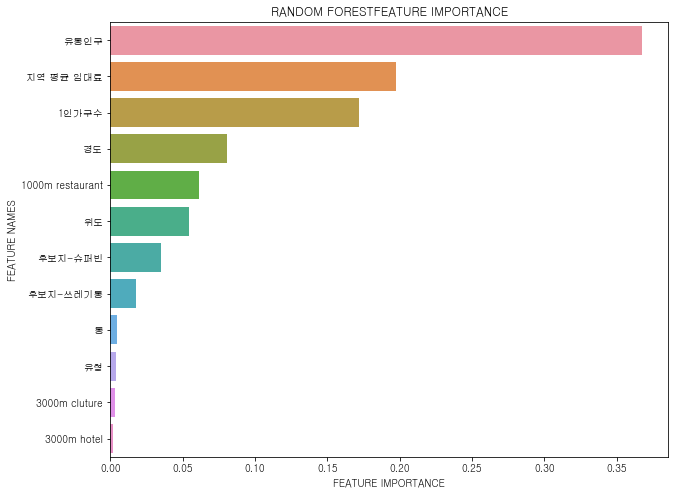

In [9]:
plot_feature_importance(forest.feature_importances_,x_train.columns,'RANDOM FOREST')

In [1]:
# 동, 3000m cluture, 유형, 3000m hotel은 컬럼에서 제거

In [10]:
df_candi.drop(["동","3000m cluture", "유형", "3000m hotel"],axis = 1, inplace=True)

#  유동인구 0 제거


In [12]:
df_candi= df_candi.drop(df_candi[df_candi["유동인구"]==0].index,axis=0)

In [13]:
df_candi

,name,위도,경도,유동인구,후보지-쓰레기통,후보지-슈퍼빈,1인가구수,지역 평균 임대료,1000m restaurant,target
0,사당,37.476530,126.981685,0.303871,0.903307,0.808901,0.189441,0.916795,0.026923,0.423482
1,낙성대,37.476930,126.963693,0.130022,0.392739,0.181043,0.496534,0.704463,0.475000,0.077907
2,서울대입구(관악구청),37.481247,126.952739,0.329438,0.022552,0.163852,0.710105,0.425960,0.978846,0.613583
3,봉천,37.482362,126.941892,0.508400,0.146474,0.282486,1.000000,0.572045,0.807692,0.936356
4,신림,37.484201,126.929715,0.470416,0.065926,0.139515,1.000000,0.572045,0.628846,0.898372
...,...,...,...,...,...,...,...,...,...,...
440,신림2동차고지,37.470885,126.938678,0.086194,0.192241,0.058620,0.481936,0.096186,0.498077,0.471944
441,삼성동시장,37.469281,126.931499,0.227904,0.418073,0.196282,0.271231,0.000000,0.509615,0.499134
442,삼성전자,37.467875,126.931003,0.364500,0.442948,0.237187,0.271231,0.000000,0.459615,0.635730
443,유완약국.성림교회,37.466976,126.930049,0.287801,0.480865,0.286505,0.271231,0.000000,0.426923,0.559032


# 후보지-슈퍼빈 1분위수 제거

In [14]:
for idx in df_candi[df_candi["후보지-슈퍼빈"]<=np.quantile(df_candi["후보지-슈퍼빈"],0.25)].index:
    df_candi.drop(idx,axis=0,inplace=True)

In [15]:
df_candi

,name,위도,경도,유동인구,후보지-쓰레기통,후보지-슈퍼빈,1인가구수,지역 평균 임대료,1000m restaurant,target
0,사당,37.476530,126.981685,0.303871,0.903307,0.808901,0.189441,0.916795,0.026923,0.423482
1,낙성대,37.476930,126.963693,0.130022,0.392739,0.181043,0.496534,0.704463,0.475000,0.077907
2,서울대입구(관악구청),37.481247,126.952739,0.329438,0.022552,0.163852,0.710105,0.425960,0.978846,0.613583
3,봉천,37.482362,126.941892,0.508400,0.146474,0.282486,1.000000,0.572045,0.807692,0.936356
5,구로디지털단지,37.485266,126.901401,0.523009,0.005366,0.919175,1.000000,0.572045,0.053846,0.950965
...,...,...,...,...,...,...,...,...,...,...
437,현대아파트106동,37.475103,126.932384,0.380570,0.385143,0.251670,0.481936,0.096186,0.575000,0.766319
441,삼성동시장,37.469281,126.931499,0.227904,0.418073,0.196282,0.271231,0.000000,0.509615,0.499134
442,삼성전자,37.467875,126.931003,0.364500,0.442948,0.237187,0.271231,0.000000,0.459615,0.635730
443,유완약국.성림교회,37.466976,126.930049,0.287801,0.480865,0.286505,0.271231,0.000000,0.426923,0.559032


In [16]:
# df_candi.to_csv("후보지-슈퍼빈_3.csv",encoding = "cp949", index = False)

# 타겟 1분위수 제거

In [17]:
for idx in df_candi[df_candi["target"]>=np.quantile(df_candi["target"],0.75)].index:
    df_candi.drop(idx,axis=0,inplace=True)

In [18]:
df_candi

,name,위도,경도,유동인구,후보지-쓰레기통,후보지-슈퍼빈,1인가구수,지역 평균 임대료,1000m restaurant,target
0,사당,37.476530,126.981685,0.303871,0.903307,0.808901,0.189441,0.916795,0.026923,0.423482
1,낙성대,37.476930,126.963693,0.130022,0.392739,0.181043,0.496534,0.704463,0.475000,0.077907
6,관악구청,37.488761,126.957115,0.075237,0.000000,0.324941,0.388215,0.143114,0.421154,0.320338
8,신사동주민센터,37.485419,126.918117,0.109569,0.000000,0.361444,0.450807,0.223698,0.378846,0.336677
10,은천동주민센터,37.485247,126.942418,0.081081,0.036168,0.256804,0.606586,0.270794,0.715385,0.416873
...,...,...,...,...,...,...,...,...,...,...
434,성지빌딩,37.478620,126.930836,0.355734,0.239711,0.175550,0.478869,1.000000,0.567308,0.165396
435,서림동주민센터,37.474863,126.934998,0.090577,0.350815,0.196814,0.481936,0.096186,0.657692,0.476326
441,삼성동시장,37.469281,126.931499,0.227904,0.418073,0.196282,0.271231,0.000000,0.509615,0.499134
443,유완약국.성림교회,37.466976,126.930049,0.287801,0.480865,0.286505,0.271231,0.000000,0.426923,0.559032


In [20]:
df_candi.to_csv("194_후보지.csv",encoding = "cp949", index = False)